# Illustrate crime fiction

This produces figure 3 in the paper.

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
data = pd.read_csv('../topicdata/bookleveltopicdata.tsv', sep = '\t')

In [3]:
data.head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t198,t199,docid,birthyear,firstpub,hathi_author,hathi_title,us_national,authof3ormore,age
0,0.000006,0.000031,0.011298,0.000004,0.000193,0.000005,0.000212,0.000165,0.000400,0.000138,...,0.004745,0.000002,inu.30000112046630,1911.0,1957,"Abbe, George",The winter house,False,True,46.0
1,0.000243,0.000035,0.007245,0.000004,0.000011,0.002074,0.000003,0.000009,0.000008,0.000008,...,0.035885,0.000002,uc1.$b799882,1911.0,1967,"Abbe, George",The funeral,False,True,56.0
2,0.000006,0.000005,0.012275,0.000003,0.000755,0.009934,0.000002,0.000008,0.000583,0.000278,...,0.000004,0.000002,uc1.$b149331,1911.0,1968,"Abbe, George",Yonderville,False,True,57.0
3,0.000215,0.004015,0.007680,0.001625,0.000167,0.002289,0.050386,0.000305,0.000007,0.002727,...,0.001661,0.000002,uc1.32106007981415,1927.0,1956,"Abbey, Edward",The brave cowboy : an old tale in a new time,True,True,29.0
4,0.000006,0.000005,0.000095,0.007116,0.007377,0.000231,0.062383,0.000149,0.000289,0.001048,...,0.000033,0.000002,inu.39000001136287,1927.0,1962,"Abbey, Edward",Fire on the mountain,True,True,35.0


In [4]:
authors = []
maxtopic = []
stability = []
totalrun = []
lastdates = []
firstdates = []
gaps = []
numbooks = []

for author, df in data.groupby('hathi_author'):
    thisauthortops = []
    for idx, row in df.iterrows():
        topics = row[0:200]
        maxtop = np.argmax(topics)
        thisauthortops.append(maxtop)
    topicfreqs = Counter(thisauthortops)
    maxtop, count = topicfreqs.most_common(1)[0]
    authors.append(author)
    maxtopic.append(maxtop)
    stability.append(count / len(thisauthortops))
    totalrun.append(count)
    firstdate = np.min(df.firstpub)
    lastdate = np.max(df.firstpub)
    gap = lastdate - firstdate
    lastdates.append(lastdate)
    firstdates.append(firstdate)
    gaps.append(gap)
    numbooks.append(len(thisauthortops))

In [5]:
len(authors)

2105

In [6]:
author_df = pd.DataFrame({'author': authors, 'topic': maxtopic, 'stability': stability, 'streak': totalrun, 
                          'first': firstdates, 'last': lastdates, 'gap': gaps, 'count': numbooks})

In [7]:
author_df = author_df.sort_values(by = ['stability', 'streak'])

In [8]:
author_df.tail(50)

,author,topic,stability,streak,first,last,gap,count
775,"Gregg, Cecil Freeman",106,1.0,4,1930,1932,2,4
916,"Hopson, William",6,1.0,4,1941,1949,8,4
921,"Houghton, Claude",83,1.0,4,1935,1944,9,4
959,"Isham, Frederic Stewart",127,1.0,4,1902,1912,10,4
1003,"Justus, May",32,1.0,4,1942,1952,10,4
1021,"Keeley, Edmund",59,1.0,4,1958,1985,27,4
1075,"Krasnov, P. N. (Petr Nikolaevich)",149,1.0,4,1926,1931,5,4
1126,"Leonov, Leonid",149,1.0,4,1932,1946,14,4
1155,"Lippincott, Joseph Wharton",146,1.0,4,1924,1958,34,4
1178,"Lucas, E. V. (Edward Verrall)",111,1.0,4,1922,1930,8,4


In [10]:
np.mean(author_df.stability)

0.5642674550233148

In [12]:
author_df.loc[author_df.author == 'Christie, Agatha', : ]

,author,topic,stability,streak,first,last,gap,count
355,"Christie, Agatha",106,0.486486,18,1923,1972,49,37


In [13]:
crime = author_df.loc[author_df.topic.isin([88, 50, 35, 106]), : ]

In [14]:
crime.shape

(189, 8)

In [44]:
crime_authors = ['Paretsky, Sara', 'Chandler, Raymond', 'Himes, Chester B', 'Parker, Robert B',
                 'Gardner, Erle Stanley', 'Highsmith, Patricia', 'Stout, Rex', 
                 'Christie, Agatha', 'Crofts, Freeman Wills', 'Leonard, Elmore']

In [45]:
crimauthors = []
crimtopics = []
crimdates = []

for idx, row in data.iterrows():
    if row.hathi_author not in crime_authors:
        continue
    else:
        crimauthors.append(row.hathi_author)
        topics = row[0:200]
        maxtop = np.argmax(topics)
        crimtopics.append(maxtop)
        crimdates.append(row.firstpub)
        
vizframe = pd.DataFrame({'author': crimauthors, 'maxtopic': crimtopics, 'pubdate': crimdates})
        

In [46]:
vizframe.head()

,author,maxtopic,pubdate
0,"Chandler, Raymond",50,1940
1,"Chandler, Raymond",101,1939
2,"Chandler, Raymond",88,1949
3,"Chandler, Raymond",101,1950
4,"Chandler, Raymond",50,1953


In [47]:
Counter(vizframe.maxtopic).most_common()

[(106, 29),
 (88, 28),
 (35, 13),
 (111, 11),
 (83, 7),
 (171, 5),
 (50, 4),
 (101, 2),
 (9, 2),
 (20, 2),
 (89, 2),
 (80, 1),
 (190, 1),
 (141, 1),
 (63, 1),
 (126, 1),
 (90, 1),
 (57, 1)]

In [48]:
for topicnum in set(vizframe.maxtopic):
    if not topicnum in set([106, 88, 35, 111, 171, 50]):
        vizframe = vizframe.replace(topicnum, 'other')

In [49]:
vizframe.sample(12)

,author,maxtopic,pubdate
45,"Crofts, Freeman Wills",106,1928
82,"Himes, Chester B",other,1966
109,"Stout, Rex",88,1947
8,"Christie, Agatha",106,1927
78,"Himes, Chester B",171,1959
96,"Paretsky, Sara",88,1987
102,"Parker, Robert B",35,1997
31,"Christie, Agatha",111,1944
81,"Himes, Chester B",171,1965
111,"Stout, Rex",88,1961


In [27]:
import seaborn as sns
from matplotlib import pyplot as plt

In [51]:
pal = sns.color_palette('bright')
print(pal.as_hex())
colors = ['#023eff', '#ff7c00', '#1ac938', '#e8000b', '#8b2be2', '#9f4800', '#a3a3a3', '#00d7ff']
customPalette = sns.set_palette(sns.color_palette(colors))

['#023eff', '#ff7c00', '#1ac938', '#e8000b', '#8b2be2', '#9f4800', '#f14cc1', '#a3a3a3', '#ffc400', '#00d7ff']


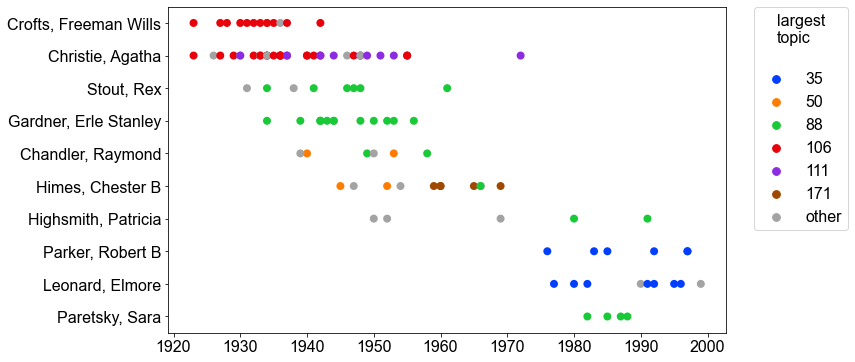

In [52]:
plt.figure(figsize = (10, 6))
plt.rcParams.update({'font.sans-serif':'Arial'})
plt.rcParams.update({'font.size': 16})
sns.stripplot(data = vizframe, y = 'author', x = 'pubdate', hue = 'maxtopic',
               order = ['Crofts, Freeman Wills', 'Christie, Agatha', 'Stout, Rex',
                          'Gardner, Erle Stanley', 'Chandler, Raymond',
                           'Himes, Chester B', 'Highsmith, Patricia', 'Parker, Robert B',
                          'Leonard, Elmore', 'Paretsky, Sara'],
             jitter = False, hue_order = [35, 50, 88, 106, 111, 171, 'other'],
             palette = customPalette, size = 8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = 'largest\ntopic\n')
plt.xlabel("")
plt.ylabel("")
plt.gcf().set_facecolor('white')
# plt.savefig('/Users/tunder/Dropbox/python/cohort/figures/authorstrip.png', bbox_inches = 'tight', dpi = 300)